# New York Fish Stocking

* This notebook contains a series of codes that analyzes open data on fish stocking in New York, United States

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Dowloading Data: New York Fish Stocking CSV

In [46]:
newyork_df = pd.read_csv('../data/NY_Stocking.csv')

In [47]:
newyork_df.head()

,Year,County,Waterbody,Town,Month,Number,Species,Size (Inches)
0,2021,Warren,Accessible Pond 1,Hatchery,April,30.0,Rainbow Trout,9.5
1,2021,Warren,Accessible Pond 1,Hatchery,April,30.0,Rainbow Trout,9.3
2,2021,Warren,Accessible Pond 1,Hatchery,April,30.0,Rainbow Trout,9.9
3,2021,Warren,Accessible Pond 1,Hatchery,April,30.0,Rainbow Trout,9.9
4,2021,Warren,Accessible Pond 1,Hatchery,March,10.0,Rainbow Trout,14.9


## Cleaning up & Applying Filters

### Rename columns

In [48]:
newyork_df.columns

Index(['Year', 'County', 'Waterbody', 'Town', 'Month', ' Number ', 'Species',
       'Size (Inches)'],
      dtype='object')

In [49]:
newyork_df = newyork_df.rename(columns = {
                        ' Number ': 'Number',
                        'Size (Inches)': 'Size' } )

In [50]:
newyork_df.loc[newyork_df['County'] == "Erie"]

,Year,County,Waterbody,Town,Month,Number,Species,Size
310,2021,Erie,Buffalo Creek,West Seneca,March,5000.0,Steelhead,5.4
311,2021,Erie,Buffalo River,West Seneca,April,5000.0,Steelhead,6.4
465,2021,Erie,Cattaraugus Creek,Sardinia,March,210.0,Brown Trout,13.1
466,2021,Erie,Cattaraugus Creek,Sardinia,March,1850.0,Brown Trout,9.3
480,2021,Erie,Cayuga Creek,Cheektowaga,March,5000.0,Steelhead,5.4
...,...,...,...,...,...,...,...,...
28938,2011,Erie,Sprague Brook Park A and B Pon,Concord,April,100.0,Brown Trout,14.4
28939,2011,Erie,Sprague Brook Park A and B Pon,Concord,April,200.0,Rainbow Trout,8.7
28940,2011,Erie,Sprague Brook Park Veteran's P,Concord,April,100.0,Brown Trout,14.4
28941,2011,Erie,Sprague Brook Park Veteran's P,Concord,April,200.0,Rainbow Trout,8.7


In [51]:
newyork_df.loc[newyork_df['Waterbody'] == "Lake Erie"]

,Year,County,Waterbody,Town,Month,Number,Species,Size
12278,2017,Erie,Lake Erie,Buffalo,April,1000.0,Rainbow Trout,9.3
12279,2017,Chautauqua,Lake Erie,Dunkirk,April,16170.0,Brown Trout,8.7
12280,2017,Erie,Lake Erie,Evans,April,4130.0,Brown Trout,8.8
12281,2017,Chautauqua,Lake Erie,Sheridan,April,8090.0,Brown Trout,8.4
12282,2017,Chautauqua,Lake Erie,Westfield,April,8090.0,Brown Trout,8.5
14775,2016,Erie,Lake Erie,Buffalo,April,1000.0,Rainbow Trout,9.0
14776,2016,Chautauqua,Lake Erie,Dunkirk,April,16900.0,Brown Trout,8.4
14777,2016,Erie,Lake Erie,Evans,April,4310.0,Brown Trout,8.9
14778,2016,Chautauqua,Lake Erie,Sheridan,April,8450.0,Brown Trout,8.4
14779,2016,Chautauqua,Lake Erie,Westfield,April,8450.0,Brown Trout,8.4


In [52]:
lakeerie_stocking = newyork_df.loc[newyork_df['Waterbody'] == "Lake Erie"]

In [53]:
lakeerie_stocking['Number'].sum()

295840.0

### Extracting Occurrences Where Lake Ontario Was Stocked

In [54]:
newyork_df.loc[newyork_df['Waterbody'] == "Lake Ontario"]

,Year,County,Waterbody,Town,Month,Number,Species,Size
1323,2021,Orleans,Lake Ontario,Carlton,May,20000.0,Landlocked Salmon,7.0
1324,2021,Orleans,Lake Ontario,Carlton,May,16275.0,Brown Trout,7.6
1325,2021,Orleans,Lake Ontario,Carlton,May,16275.0,Brown Trout,7.8
1326,2021,Jefferson,Lake Ontario,Chaumont,September,1000.0,Lake Sturgeon,6.1
1327,2021,Monroe,Lake Ontario,Greece,April,16275.0,Brown Trout,7.8
...,...,...,...,...,...,...,...,...
27935,2011,Wayne,Lake Ontario,Williamson,May,20320.0,Brown Trout,7.2
27936,2011,Niagara,Lake Ontario,Wilson,June,10570.0,Brown Trout,9.0
27937,2011,Niagara,Lake Ontario,Wilson,May,10600.0,Brown Trout,8.9
27938,2011,Niagara,Lake Ontario,Wilson,May,12500.0,Rainbow Trout,8.6


In [55]:
lakeontario_stocking = newyork_df.loc[newyork_df['Waterbody'] == "Lake Ontario"]

In [56]:
lakeontario_stocking

,Year,County,Waterbody,Town,Month,Number,Species,Size
1323,2021,Orleans,Lake Ontario,Carlton,May,20000.0,Landlocked Salmon,7.0
1324,2021,Orleans,Lake Ontario,Carlton,May,16275.0,Brown Trout,7.6
1325,2021,Orleans,Lake Ontario,Carlton,May,16275.0,Brown Trout,7.8
1326,2021,Jefferson,Lake Ontario,Chaumont,September,1000.0,Lake Sturgeon,6.1
1327,2021,Monroe,Lake Ontario,Greece,April,16275.0,Brown Trout,7.8
...,...,...,...,...,...,...,...,...
27935,2011,Wayne,Lake Ontario,Williamson,May,20320.0,Brown Trout,7.2
27936,2011,Niagara,Lake Ontario,Wilson,June,10570.0,Brown Trout,9.0
27937,2011,Niagara,Lake Ontario,Wilson,May,10600.0,Brown Trout,8.9
27938,2011,Niagara,Lake Ontario,Wilson,May,12500.0,Rainbow Trout,8.6


In [57]:
lakeontario_stocking['Species'].unique()

array(['Landlocked Salmon', 'Brown Trout', 'Lake Sturgeon', 'Lake Trout',
       'Coho', 'Rainbow Trout', 'Chinook', 'Lake Herring (Cisco)'],
      dtype=object)

### Extracting Required Years (2013 - 2021)

In [58]:
year_filter = lakeontario_stocking['Year'] >2012
ny_lake_ontario = lakeontario_stocking[year_filter]
ny_lake_ontario['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013])

In [59]:
### Save the filtered data



In [60]:
ny_lake_ontario.to_csv('../data/NY_lakeontario_2013-2021.csv', index=False)

## Exploring Species Stocked

In [61]:
ny_species = ny_lake_ontario['Species'].unique()
print(ny_species)

['Landlocked Salmon' 'Brown Trout' 'Lake Sturgeon' 'Lake Trout' 'Coho'
 'Rainbow Trout' 'Chinook' 'Lake Herring (Cisco)']


In [62]:
ny_species_count = ny_lake_ontario['Species'].value_counts()
print(ny_species_count)

Brown Trout             222
Lake Trout               91
Rainbow Trout            51
Chinook                  13
Landlocked Salmon         9
Lake Sturgeon             6
Coho                      6
Lake Herring (Cisco)      5
Name: Species, dtype: int64


### Creating a data subset grouped by Year followed by Species

In [63]:
species_by_year = ny_lake_ontario.groupby('Year')['Species'].value_counts().unstack()
species_by_year

Species,Brown Trout,Chinook,Coho,Lake Herring (Cisco),Lake Sturgeon,Lake Trout,Landlocked Salmon,Rainbow Trout
Year,,,,,,,,
2013,17.0,2.0,1.0,NaN,NaN,13.0,1.0,9.0
2014,28.0,2.0,NaN,3.0,NaN,16.0,1.0,8.0
2015,30.0,2.0,1.0,2.0,NaN,16.0,1.0,8.0
2016,22.0,2.0,1.0,NaN,NaN,10.0,1.0,7.0
2017,26.0,2.0,NaN,NaN,NaN,6.0,1.0,7.0
2018,24.0,2.0,1.0,NaN,1.0,10.0,1.0,6.0
2019,31.0,1.0,1.0,NaN,3.0,9.0,1.0,6.0
2020,19.0,NaN,1.0,NaN,1.0,7.0,1.0,NaN
2021,25.0,NaN,NaN,NaN,1.0,4.0,1.0,NaN


#### Plotting Number of Fish Stocking Occurrences by Species

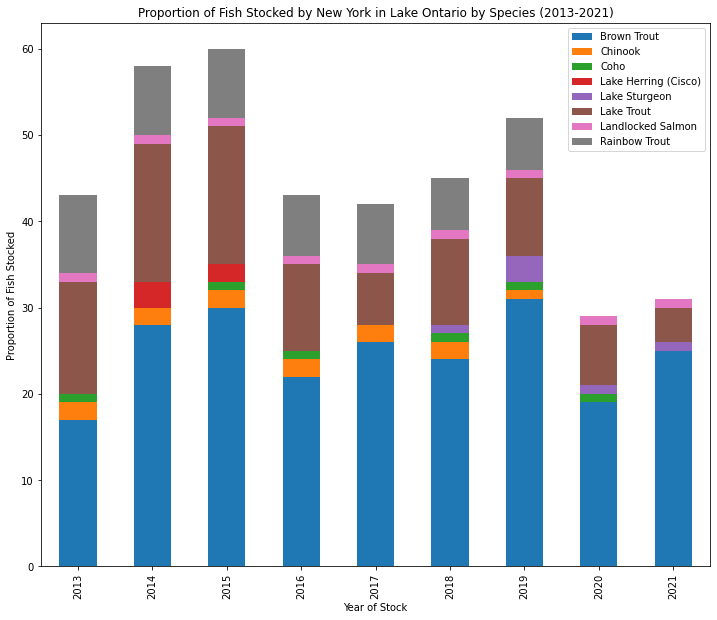

In [65]:
species_by_year.plot(kind='bar', stacked=True, figsize=(12,10))
plt.ylabel('Proportion of Fish Stocked')
plt.xlabel('Year of Stock')
plt.title('Proportion of Fish Stocked by New York in Lake Ontario by Species (2013-2021)')
plt.legend(
   bbox_to_anchor=(0.8, 0.4, 0.2, 0.6))
plt.show()

This bar graph demonstrates the proportion of each fish species New York stocks into Lake Ontario in terms of stocking instances. Each species is stocked on multiple occasions into Lake Ontario every year, with each stocking varying in the actual number of fish stocked. The graph above represents stocking instances, not total fish stocked. We will go into the differences and discuss some potential reasons why this is in our blog post.


### Creating data subset grouped by Year and Species followed by Number of Fish Stocked

In [66]:
species_amount_by_year = ny_lake_ontario.groupby(['Year', 'Species'])['Number'].sum().unstack()
species_amount_by_year

Species,Brown Trout,Chinook,Coho,Lake Herring (Cisco),Lake Sturgeon,Lake Trout,Landlocked Salmon,Rainbow Trout
Year,,,,,,,,
2013,322020.0,110000.0,26000.0,NaN,NaN,522580.0,20000.0,75850.0
2014,412370.0,144000.0,NaN,144670.0,NaN,970664.0,20000.0,40650.0
2015,423480.0,110000.0,19320.0,69240.0,NaN,976525.0,20000.0,75470.0
2016,487040.0,110000.0,25390.0,NaN,NaN,384240.0,20000.0,75000.0
2017,370850.0,71480.0,NaN,NaN,NaN,200846.0,20000.0,71725.0
2018,399540.0,69410.0,12200.0,NaN,2255.0,398255.0,20000.0,50020.0
2019,494860.0,54220.0,26000.0,NaN,8728.0,401500.0,5660.0,75000.0
2020,412110.0,NaN,18000.0,NaN,2250.0,304789.0,20000.0,NaN
2021,451087.0,NaN,NaN,NaN,1000.0,129400.0,20000.0,NaN


#### Plotting Amount of Fish Stocked by Year and Species

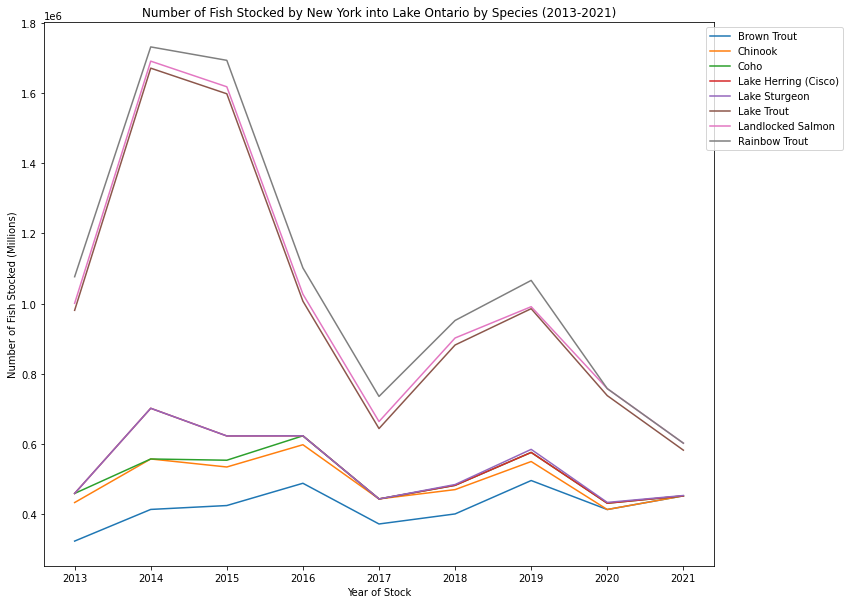

In [67]:
species_amount_by_year.plot(kind='line', stacked=True, figsize=(12,10))
plt.ylabel('Number of Fish Stocked (Millions)')
plt.xlabel('Year of Stock')
plt.title('Number of Fish Stocked by New York into Lake Ontario by Species (2013-2021)')
plt.legend(
   bbox_to_anchor=(1, 0.4, 0.2, 0.6))
plt.show()

This line graph represents the actual number of each fish species stocked by New York into Lake Ontario every year between 2013 and 2021. This graph represents quantity of fish stocked, not instances of stockings like the bar graph above. 

Our first interesting observation is that Brown Trout are stocked in the lowest quantity each year, yet the bar graph before showed us that they are stocked most frequently. Why is this? We will theorize in the blog post, but it definitely is interesting. Another observation is that after 2014, there was a sharp drop in almost all species stocked (especially Landlocked Salmon, Rainbow Trout, and Lake Trout). Then, after 2017, these numbers seem to rise again then fall back down after 2019. To fully understand this we will likely need to look for some qualitative information. It is interesting, however, that the quantity of each species stocked seems to fluctuate in the same general direction. When a few species are stocked at a lower quantity, it seems like the rest follow. Could this be due to some macro-level theme related to New York fish stocking into Lake Ontario as a whole?



In [68]:
ny_lake_ontario

,Year,County,Waterbody,Town,Month,Number,Species,Size
1323,2021,Orleans,Lake Ontario,Carlton,May,20000.0,Landlocked Salmon,7.0
1324,2021,Orleans,Lake Ontario,Carlton,May,16275.0,Brown Trout,7.6
1325,2021,Orleans,Lake Ontario,Carlton,May,16275.0,Brown Trout,7.8
1326,2021,Jefferson,Lake Ontario,Chaumont,September,1000.0,Lake Sturgeon,6.1
1327,2021,Monroe,Lake Ontario,Greece,April,16275.0,Brown Trout,7.8
...,...,...,...,...,...,...,...,...
22699,2013,Monroe,Lake Ontario,Webster,June,19630.0,Brown Trout,8.8
22700,2013,Monroe,Lake Ontario,Webster,May,10000.0,Rainbow Trout,9.3
22701,2013,Wayne,Lake Ontario,Williamson,May,17450.0,Brown Trout,7.9
22702,2013,Niagara,Lake Ontario,Wilson,May,18180.0,Brown Trout,8.7


In [70]:
ny_lake_ontario.groupby('Month')['Number'].sum().sort_values()

Month
August          7441.0
November       76960.0
July          133790.0
September     189920.0
March         202050.0
April         280525.0
June          424610.0
October      1115711.0
May          7284687.0
Name: Number, dtype: float64

In [72]:
ny_lake_ontario.groupby(['Species','Month'])['Number'].sum()

Species               Month    
Brown Trout           April         161655.0
                      July          133790.0
                      June          363545.0
                      March         182050.0
                      May          2879967.0
                      November       25400.0
                      October        26950.0
Chinook               April           7050.0
                      May           662060.0
Coho                  November       25390.0
                      October       101520.0
Lake Herring (Cisco)  November       26170.0
                      September     187740.0
Lake Sturgeon         August          7441.0
                      October         4612.0
                      September       2180.0
Lake Trout            May          3306170.0
                      October       982629.0
Landlocked Salmon     March          20000.0
                      May           145660.0
Rainbow Trout         April         111820.0
                      J

The above table shows us which months each species was stocked, and how many fish of that species were stocked in those months. There are a lot of interesting observations that can be made from this. For example, Brown Trout are stocked throughout the year while Lake Trout are only stocked in May and October.